In [1]:
%pip install sqlalchemy pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



Missing values:
City          0
Date          0
Temp          0
Humidity      0
Precip        0
PrecipProb    0
Snow          0
Windspeed     0
Conditions    0
Icon          0
DayOFWeek     0
dtype: int64

Dataset starts at: 2021-01-01 00:00:00
Dataset ends at: 2025-12-27 00:00:00


City          string[python]
Date          datetime64[ns]
Temp                 float64
Humidity             float64
Precip               float64
PrecipProb             int64
Snow                 float64
Windspeed            float64
Conditions    string[python]
Icon          string[python]
DayOFWeek           category
dtype: object

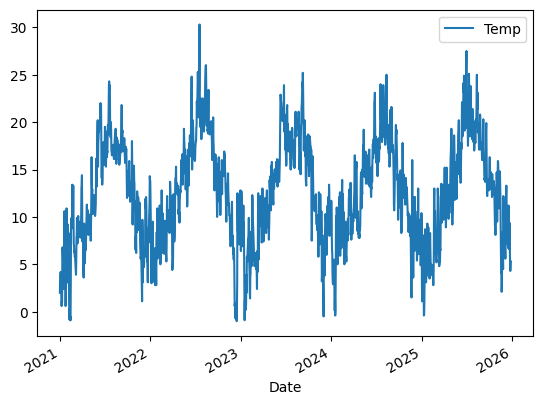

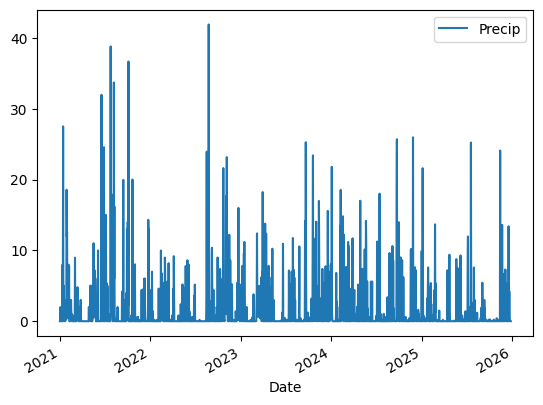

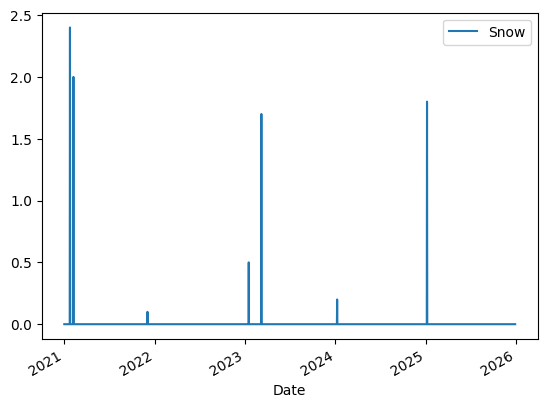

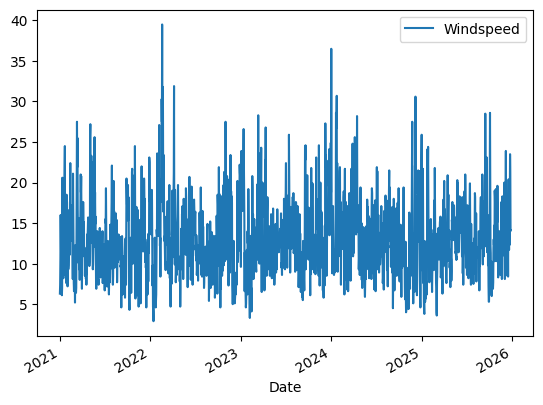

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)

data_path = os.path.join('..', 'data', 'raw', 'weather_data.csv')

df = pd.read_csv(data_path)

# convert Date to actual datetime objects for better plotting
df['Date'] = pd.to_datetime(df['Date'])
# extract day of week data from date column
df['DayOFWeek'] = df['Date'].dt.day_name()
# convert DayOFWeek column to categorical datatype
df['DayOFWeek'] = df['DayOFWeek'].astype(cat_type)
df[['City','Conditions']] = df[['City','Conditions']].astype('string')
# convert Icon column to string datatype
df['Icon'] = df['Icon'].astype('string')


missing_per_column = df.isna().sum()
print('\nMissing values:')
print(missing_per_column)

# check min and max dates for the combined dataframe
print(f"\nDataset starts at: {df['Date'].min()}")
print(f"Dataset ends at: {df['Date'].max()}")

# visualisae data to detect any obvious anomolies 
df[['Date','Temp']].plot(x='Date',y='Temp')

df[['Date','Precip']].plot(x='Date',y='Precip')

df[['Date','Snow']].plot(x='Date',y='Snow')

df[['Date','Windspeed']].plot(x='Date',y='Windspeed')

df.head()

df.dtypes

In [3]:
import sys
sys.path.append('..') # go up to root to find 'src'
from src.load_to_sql import upload_dataframe

upload_dataframe(df, table_name='weather')

Connecting to database at: c:\Users\lewis\Documents\projects\weather-tfl-footfall\data\processed\transport_weather.db
Table 'weather' uploaded.
Current tables in DB: ['footfall', 'weather']
